In [1]:
%load_ext autoreload
%autoreload 2 
from fibsem import utils, milling, acquire, constants 
from fibsem.microscope import FibsemMicroscope, ThermoMicroscope
from fibsem.structures import FibsemPatternSettings, FibsemPattern, FibsemImage, BeamType, FibsemStagePosition, Point
import matplotlib
import matplotlib.pyplot as plt
import math 


Connection & set up

In [2]:
microscope, settings = utils.setup_session(config_path= r"C:\Users\lnae0002\Desktop\fibsem\fibsem\config", protocol_path=r'C:\Users\lnae0002\Desktop\fibsem\example\protocol_autolamella.yaml')
assert isinstance(microscope, FibsemMicroscope)

2023-03-27 10:59:02,674 — root — INFO — connect_to_microscope:2010 — Microscope client connecting to [localhost:8300]
2023-03-27 10:59:02,677 — root — INFO — connect_to_microscope:2012 — Microscope client connected to [localhost:8300]
2023-03-27 10:59:02,678 — root — INFO — setup_session:227 — Finished setup for session: autolamella_demo_2023-03-27-10-59-02AM


In [3]:
def plot_images(eb_image, ib_image):    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    ax[0].imshow(eb_image.data, cmap="gray")
    ax[0].set_title("Electron Image")
    ax[1].imshow(ib_image.data, cmap="gray")
    ax[1].set_title("Ion Image")
    plt.show()

Acquire images

2023-03-27 10:59:14,084 — root — INFO — acquire_image:2024 — acquiring new ELECTRON image.
2023-03-27 10:59:16,707 — root — INFO — acquire_image:2024 — acquiring new ION image.
2023-03-27 10:59:19,725 — root — INFO — acquire_image:2024 — acquiring new ELECTRON image.
2023-03-27 10:59:22,297 — root — INFO — acquire_image:2024 — acquiring new ION image.


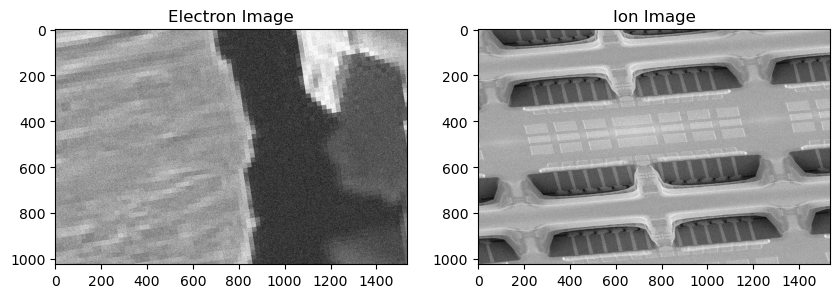

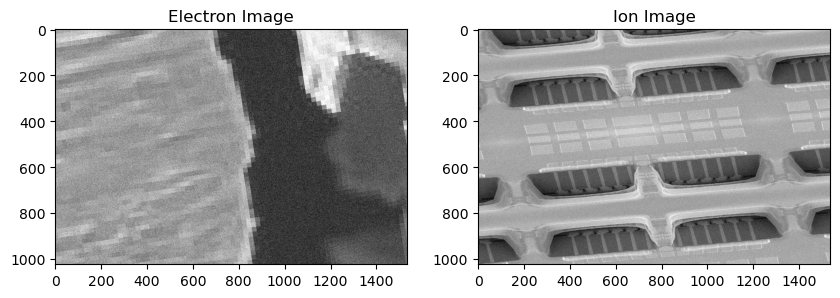

In [4]:
settings.image.autocontrast = False
settings.image.beam_type = BeamType.ELECTRON
eb_image = acquire.new_image(microscope, settings.image)
settings.image.beam_type = BeamType.ION
ib_image = acquire.new_image(microscope, settings.image)
ref_images = acquire.take_reference_images(microscope, settings.image)

plot_images(eb_image, ib_image)
plot_images(ref_images[0], ref_images[1])




In [28]:
assert isinstance(eb_image, FibsemImage)
assert isinstance(ib_image, FibsemImage)
assert isinstance(ref_images[0], FibsemImage)
assert isinstance(ref_images[1], FibsemImage)
assert ib_image.metadata.compare_image_settings(settings.image)
assert ref_images[1].metadata.compare_image_settings(settings.image)
assert eb_image.metadata.version == "v1"
assert ib_image.metadata.version == "v1"
assert ref_images[0].metadata.version == "v1"
assert ref_images[1].metadata.version == "v1"
assert eb_image.metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ELECTRON)
assert ib_image.metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ION)
assert ref_images[0].metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ELECTRON)
assert ref_images[1].metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ION)
assert eb_image.metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ELECTRON)
assert ib_image.metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ION)
assert ref_images[0].metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ELECTRON)
assert ref_images[1].metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ION)
assert eb_image.metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ELECTRON)
assert ib_image.metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ION)
assert ref_images[0].metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ELECTRON)
assert ref_images[1].metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ION)
if isinstance(microscope, ThermoMicroscope):
    assert eb_image.metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ELECTRON)
    assert ib_image.metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ION)
    assert ref_images[0].metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ELECTRON)
    assert ref_images[1].metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ION)

Last image

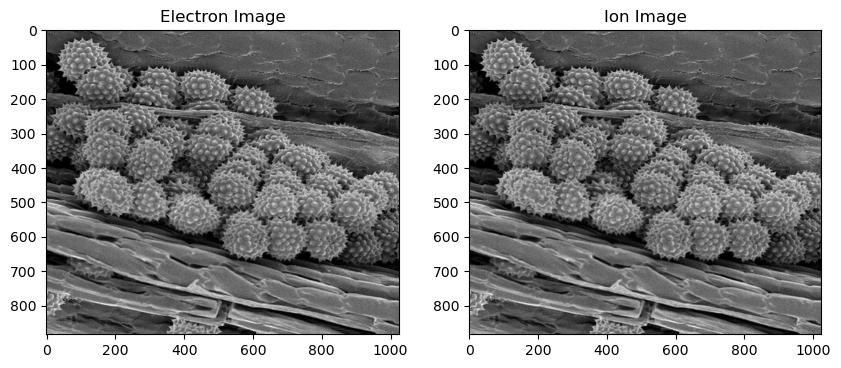

In [29]:
last_eb = microscope.last_image(beam_type=BeamType.ELECTRON)
last_ib = microscope.last_image(beam_type=BeamType.ION)

plot_images(last_eb, last_ib)


In [30]:
assert isinstance(last_eb, FibsemImage)
assert isinstance(last_ib, FibsemImage)
assert last_ib.metadata.compare_image_settings(settings.image)
assert last_eb.metadata.version == "v1"
assert last_ib.metadata.version == "v1"
assert last_eb.metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ELECTRON)
assert last_ib.metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ION)
assert last_eb.metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ELECTRON)
assert last_ib.metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ION)
assert last_eb.metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ELECTRON)
assert last_ib.metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ION)
if isinstance(microscope, ThermoMicroscope):
    assert last_eb.metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ELECTRON)
    assert last_ib.metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ION)

Auto contrast and autofocus

In [31]:
microscope.auto_focus(beam_type=BeamType.ELECTRON)
microscope.autocontrast(beam_type=BeamType.ION)
microscope.autocontrast(beam_type=BeamType.ELECTRON)

2023-03-15 15:33:04,562 — root — INFO — auto_focus:550 — Running auto-focus on ELECTRON.
2023-03-15 15:33:06,567 — root — INFO — autocontrast:539 — Running autocontrast on ION.
2023-03-15 15:33:08,572 — root — INFO — autocontrast:539 — Running autocontrast on ELECTRON.


Beam shift

In [32]:
microscope.reset_beam_shifts()
microscope.beam_shift(dx=1e-6, dy=1e-6, beam_type=BeamType.ELECTRON)
microscope.reset_beam_shifts()

2023-03-15 15:33:10,701 — root — INFO — beam_shift:586 — ELECTRON shifting by (1e-06, 1e-06)


## Movement

Absolute & Relative movement

In [5]:
abs_position = FibsemStagePosition(x=0.001, y=0.001, z=0.060, r = 0.1, t = 0.1)
microscope.move_stage_absolute(abs_position)
current_position = microscope.get_stage_position()
assert current_position.x == abs_position.x
assert current_position.y == abs_position.y
assert current_position.z == abs_position.z
assert math.isclose(current_position.r, abs_position.r, abs_tol=1e-6)
assert math.isclose(current_position.t, abs_position.t, abs_tol=1e-6)

rel_position = FibsemStagePosition(x=0.001, y=0.001, z=0.001, r = 0.05, t = 0.05)
microscope.move_stage_relative(rel_position)
current_position2 = microscope.get_stage_position()
assert current_position2.x == (current_position.x + rel_position.x)
assert current_position2.y == (current_position.y + rel_position.y)
assert current_position2.z == (current_position.z + rel_position.z)
assert math.isclose(current_position2.r, (current_position.r + rel_position.r), abs_tol=1e-6)
assert math.isclose(current_position2.t, (current_position.t + rel_position.t), abs_tol=1e-6)

NotImplementedError: The microscope does not have a moving stage.

Move flat to beam

In [34]:
microscope.move_flat_to_beam(settings, beam_type=BeamType.ELECTRON)
assert math.isclose(microscope.get_stage_position().t, settings.system.stage.tilt_flat_to_electron, abs_tol=1e-6)
microscope.move_flat_to_beam(settings, beam_type=BeamType.ION)
assert math.isclose(microscope.get_stage_position().t, settings.system.stage.tilt_flat_to_ion*constants.DEGREES_TO_RADIANS , abs_tol=1e-6)

2023-03-15 15:33:10,966 — root — INFO — move_flat_to_beam:873 — moving flat to ELECTRON
2023-03-15 15:33:10,967 — root — INFO — move_stage_absolute:661 — Moving stage to FibsemStagePosition(x=0.002, y=0.002, z=0.061, r=0.8552113334772214, t=0.0, coordinate_system=None).
2023-03-15 15:33:10,970 — root — INFO — move_flat_to_beam:873 — moving flat to ION
2023-03-15 15:33:10,970 — root — INFO — move_stage_absolute:661 — Moving stage to FibsemStagePosition(x=0.002, y=0.002, z=0.061, r=3.9968039870670147, t=0.9075712110370514, coordinate_system=None).


Stable and Eucentric moves

In [35]:
microscope.stable_move(settings, beam_type=BeamType.ELECTRON, dx=10e-6, dy=10e-6)
microscope.eucentric_move(settings, dy=10e-6)

#### Visual check ####

2023-03-15 15:33:11,098 — root — INFO — stable_move:722 — moving stage (ELECTRON): FibsemStagePosition(x=1e-05, y=1.624269245482745e-05, z=-0.0, r=0, t=0, coordinate_system='raw')
2023-03-15 15:33:11,098 — root — INFO — move_stage_relative:681 — Moving stage by FibsemStagePosition(x=1e-05, y=1.624269245482745e-05, z=-0.0, r=0, t=0, coordinate_system='raw').
2023-03-15 15:33:11,102 — root — INFO — eucentric_move:753 — eucentric movement: StagePosition(x=0, y=0, z=1.2690182e-05, t=0, r=0, coordinate_system=Specimen)


## Microscope state 

In [36]:
current_state = microscope.get_current_microscope_state()
current_position = microscope.get_stage_position()
assert current_state.absolute_position.x == current_position.x
assert current_state.absolute_position.y == current_position.y
assert current_state.absolute_position.z == current_position.z
assert math.isclose(current_state.absolute_position.r, current_position.r, abs_tol=1e-6)
assert math.isclose(current_state.absolute_position.t, current_position.t, abs_tol=1e-6)
assert math.isclose(current_state.eb_settings.beam_current, microscope.get("current", beam_type=BeamType.ELECTRON), abs_tol=1e-6)
assert math.isclose(current_state.ib_settings.beam_current, microscope.get("current", beam_type=BeamType.ION), abs_tol=1e-6)
assert current_state.eb_settings.working_distance == microscope.get("working_distance", beam_type=BeamType.ELECTRON)
assert current_state.eb_settings.hfw == microscope.get("hfw", beam_type=BeamType.ELECTRON)
assert current_state.ib_settings.hfw == microscope.get("hfw", beam_type=BeamType.ION)


## Milling 

Line pattern

In [37]:
line = FibsemPatternSettings(
    pattern= FibsemPattern.Line,
    start_x=0.0,
    start_y=0.0,
    end_x=20e-6,
    end_y=20e-6,
    depth=1e-6,
)

milling.milling_protocol(
    microscope,
    settings.milling,
    patterns=[line],
    drift_correction=False,
)

2023-03-15 15:33:11,363 — root — INFO — run_milling:1093 — changing to milling current: 2.00e-09
2023-03-15 15:33:11,364 — root — INFO — run_milling:1097 — running ion beam milling now... asynchronous=False
2023-03-15 15:33:32,369 — root — INFO — finish_milling:74 — changing to imaging current: 2.00e-11
2023-03-15 15:33:32,371 — root — INFO — finish_milling:76 — finished ion beam milling.


Rectangle pattern

In [38]:
rectangle = FibsemPatternSettings(
    pattern= FibsemPattern.Rectangle,
    centre_x = 0.0,
    centre_y = 0.0,
    width = 20e-6,
    height = 20e-6,
    depth = 1e-6,
)

milling.milling_protocol(
    microscope,
    settings.milling,
    patterns=[rectangle],
    drift_correction=False,
)

2023-03-15 15:33:32,519 — root — INFO — run_milling:1093 — changing to milling current: 2.00e-09
2023-03-15 15:33:32,521 — root — INFO — run_milling:1097 — running ion beam milling now... asynchronous=False
2023-03-15 15:33:53,526 — root — INFO — finish_milling:74 — changing to imaging current: 2.00e-11
2023-03-15 15:33:53,529 — root — INFO — finish_milling:76 — finished ion beam milling.


Circle pattern

In [39]:
circle = FibsemPatternSettings(
    pattern= FibsemPattern.Circle,
    centre_x = 0.0,
    centre_y = 0.0,
    radius = 10e-6,
    depth = 1e-6,
)

milling.milling_protocol(
    microscope,
    settings.milling,
    patterns=[circle],
    drift_correction=False,
)

2023-03-15 15:33:53,679 — root — INFO — run_milling:1093 — changing to milling current: 2.00e-09
2023-03-15 15:33:53,680 — root — INFO — run_milling:1097 — running ion beam milling now... asynchronous=False
2023-03-15 15:34:14,684 — root — INFO — finish_milling:74 — changing to imaging current: 2.00e-11
2023-03-15 15:34:14,686 — root — INFO — finish_milling:76 — finished ion beam milling.


Trench pattern

In [40]:
patterns = []
for i, protocol in enumerate(
            settings.protocol["lamella"]["protocol_stages"]
        ):
        protocol["milling_depth"] = 0.1e-6
        lower_pattern_settings, upper_pattern_settings = milling.extract_trench_parameters(protocol, Point(0, 0))
        patterns.append(lower_pattern_settings)
        patterns.append(upper_pattern_settings)

milling.milling_protocol(
    microscope,
    settings.milling,
    patterns=patterns,
    drift_correction=False,
)




2023-03-15 15:34:14,850 — root — INFO — run_milling:1093 — changing to milling current: 2.00e-09
2023-03-15 15:34:14,851 — root — INFO — run_milling:1097 — running ion beam milling now... asynchronous=False
2023-03-15 15:34:35,856 — root — INFO — finish_milling:74 — changing to imaging current: 2.00e-11
2023-03-15 15:34:35,858 — root — INFO — finish_milling:76 — finished ion beam milling.


## Sputter platinum

In [41]:
protocol = {}
protocol["hfw"] = 150e-6
protocol["beam_current"] = 2e-9
protocol["spot_size"] = 0.1e-6
protocol["dwell_time"] = 0.1e-6
protocol["application_file"] = "Pt dep"
protocol["position"] = "Electron Default"
protocol["gas"] = "Pt"
microscope.setup_sputter(
    protocol
)
microscope.draw_sputter_pattern(
    hfw = 150e-6,
    line_pattern_length = 20e-6,
)
microscope.run_sputter()
microscope.finish_sputter()

## Get/Set parameters

In [44]:
microscope.set("on", True, beam_type=BeamType.ELECTRON)
assert microscope.get("on", beam_type=BeamType.ELECTRON) == True
microscope.set("on", True, beam_type=BeamType.ION)
assert microscope.get("on", beam_type=BeamType.ION) == True

microscope.set('working_distance', 0.06, beam_type=BeamType.ELECTRON)
assert microscope.get('working_distance', beam_type=BeamType.ELECTRON) == 0.06

microscope.set("current", 2e-11, beam_type=BeamType.ELECTRON)
assert math.isclose(microscope.get("current", beam_type=BeamType.ELECTRON), 2e-11, abs_tol=1e-12)

microscope.set("voltage", 5000, beam_type=BeamType.ELECTRON)
assert microscope.get("voltage", beam_type=BeamType.ELECTRON) == 5000

microscope.set("hfw", 150e-6, beam_type=BeamType.ELECTRON)
assert microscope.get("hfw", beam_type=BeamType.ELECTRON) == 150e-6
microscope.set("hfw", 150e-6, beam_type=BeamType.ION)
assert microscope.get("hfw", beam_type=BeamType.ION) == 150e-6

microscope.set("scan_rotation", 180, beam_type=BeamType.ELECTRON)
assert microscope.get("scan_rotation", beam_type=BeamType.ELECTRON) == 180
microscope.set("scan_rotation", 180, beam_type=BeamType.ION)
assert microscope.get("scan_rotation", beam_type=BeamType.ION) == 180

microscope.set("detector_type", "ETD", beam_type=BeamType.ELECTRON)
assert microscope.get("detector_type", beam_type=BeamType.ELECTRON) == "ETD"
microscope.set("detector_type", "ETD", beam_type=BeamType.ION)
assert microscope.get("detector_type", beam_type=BeamType.ION) == "ETD"

microscope.set("detector_brightness", 0.5, beam_type=BeamType.ELECTRON)
assert microscope.get("detector_brightness", beam_type=BeamType.ELECTRON) == 0.5
microscope.set("detector_brightness", 0.5, beam_type=BeamType.ION)
assert microscope.get("detector_brightness", beam_type=BeamType.ION) == 0.5

microscope.set("detector_contrast", 0.5, beam_type=BeamType.ELECTRON)
assert microscope.get("detector_contrast", beam_type=BeamType.ELECTRON) == 0.5
microscope.set("detector_contrast", 0.5, beam_type=BeamType.ION)
assert microscope.get("detector_contrast", beam_type=BeamType.ION) == 0.5



2023-03-15 15:37:09,746 — root — INFO — set:1637 — ELECTRON beam turned on.
2023-03-15 15:37:09,748 — root — INFO — set:1637 — ION beam turned on.
2023-03-15 15:37:09,751 — root — INFO — set:1607 — ELECTRON working distance set to 0.06 m.
2023-03-15 15:37:09,753 — root — INFO — set:1611 — ELECTRON current set to 2e-11 A.
2023-03-15 15:37:09,754 — root — INFO — set:1615 — ELECTRON voltage set to 5000 V.
2023-03-15 15:37:09,756 — root — INFO — set:1619 — ELECTRON HFW set to 0.00015 m.
2023-03-15 15:37:09,757 — root — INFO — set:1619 — ION HFW set to 0.00015 m.
2023-03-15 15:37:09,758 — root — INFO — set:1631 — ELECTRON scan rotation set to 180 degrees.
2023-03-15 15:37:09,760 — root — INFO — set:1631 — ION scan rotation set to 180 degrees.
2023-03-15 15:37:09,775 — root — INFO — set:1660 — Detector type set to ETD.
2023-03-15 15:37:09,800 — root — INFO — set:1660 — Detector type set to ETD.
2023-03-15 15:37:09,821 — root — INFO — set:1667 — Detector brightness set to 0.5.
2023-03-15 15:3